# Dive into the beehive

## Instructions

In this lesson you started looking at a dataset around bees and their honey production over a period of time that saw losses in the bee colony population overall. Dig deeper into this dataset and build a notebook that can tell the story of the health of the bee population, state by state and year by year. Do you discover anything interesting about this dataset?

## Solution

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

honey_df = pd.read_csv('../../data/honey.csv')
honey_df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### Overall Trends

What is the national trend in colony number over the years?

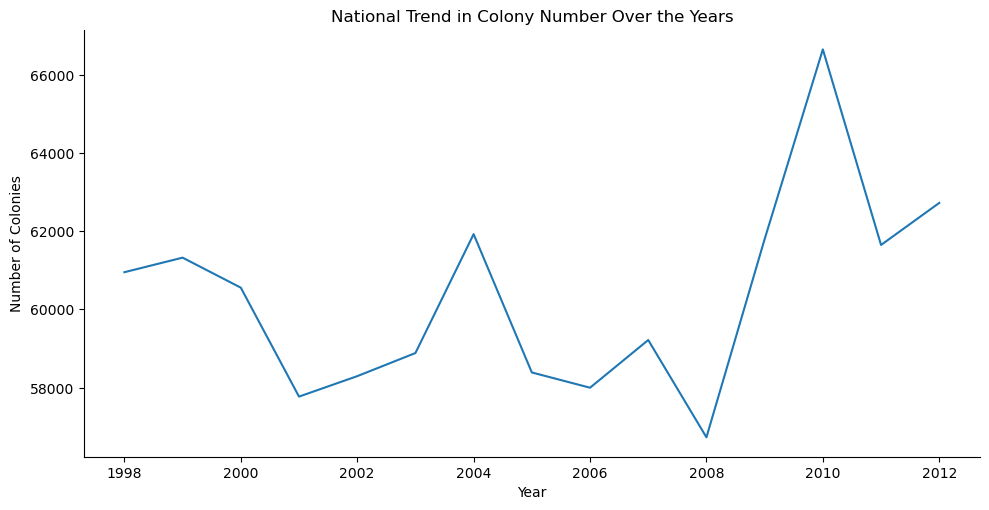

In [2]:
# Set up the plot
sns.relplot(x='year',
            y='numcol',
            data=honey_df,
            kind='line',
            errorbar=None,
            height=5,
            aspect=2)

# Add titles and labels
plt.title('National Trend in Colony Number Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Colonies')
plt.show()

The chart shows that the number of bee colonies in the United States has generally declined over the years. There are some fluctuations, but the overall trend is downward, indicating a decrease in the national bee colony population during the period covered by the dataset.

Next, let's investigate the changes in honey production over time.

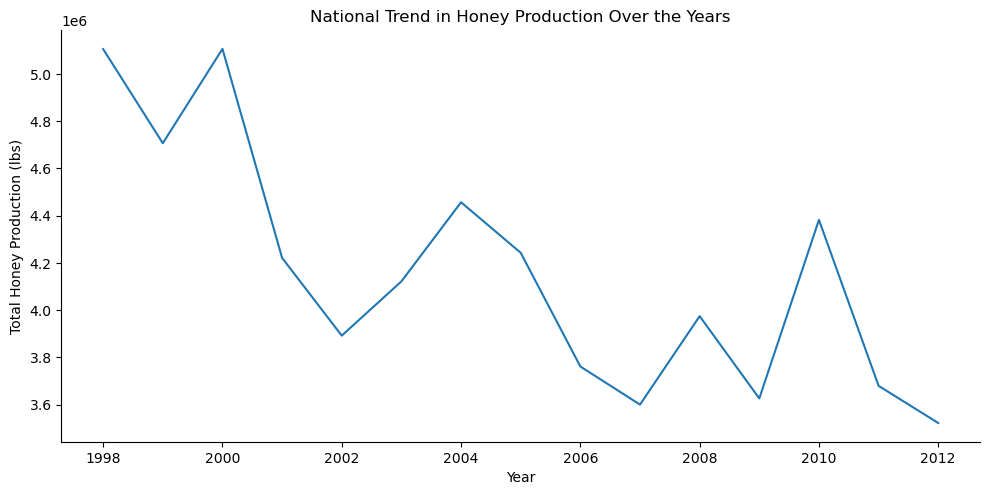

In [3]:
# Set up the plot
sns.relplot(x='year',
            y='totalprod',
            data=honey_df,
            kind='line',
            errorbar=None,
            height=5,
            aspect=2)

# Add titles and labels
plt.title('National Trend in Honey Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Honey Production (lbs)')
plt.show()

The chart shows that total honey production in the United States has generally declined over time, with some fluctuations.

### State-by-State Comparison

Let's identify states with strong/weak bee populations.

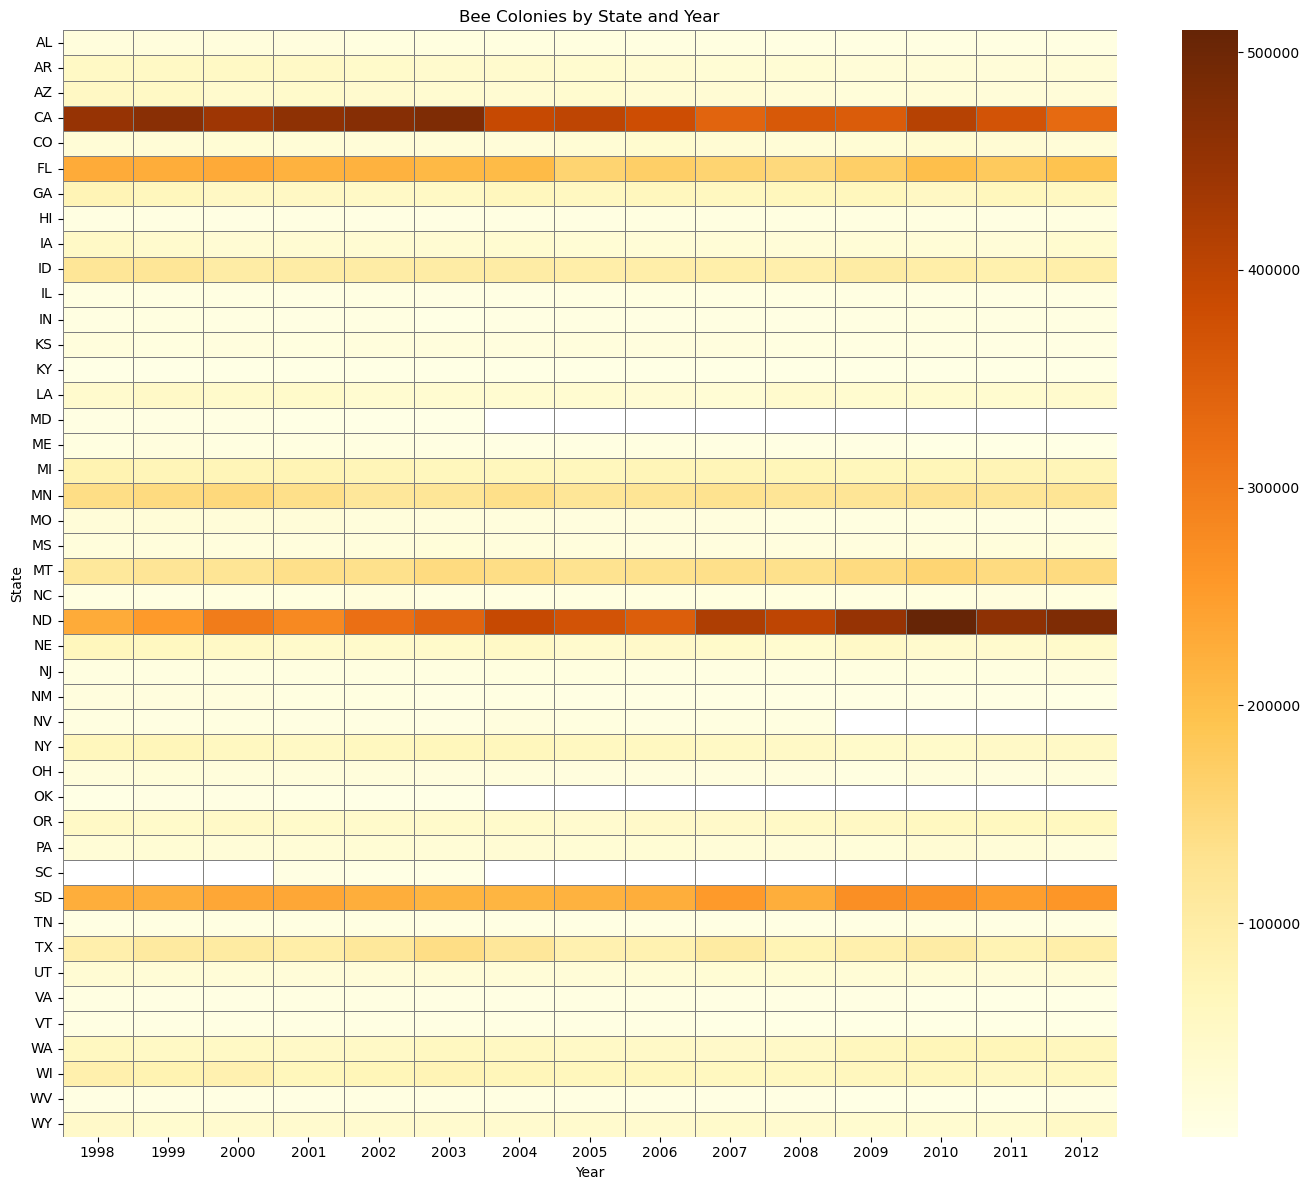

In [4]:
# Pivot the data
pivot_table = honey_df.pivot_table(index='state',
                             columns='year',
                             values='numcol',
                             aggfunc='sum')

# Set up the plot
plt.figure(figsize=(14, 12))
sns.heatmap(pivot_table,
            cmap='YlOrBr',
            linewidths=0.5,
            linecolor='gray')

# Add titles and labels
plt.title('Bee Colonies by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

Darker shades indicate higher colony numbers, while lighter shades show fewer colonies:
* Strong states (consistently high colony numbers): CA, ND, SD, FL, MT, and MN.
* Weak states (consistently low colony numbers): MD, KY, SC, VT, and WV.

### Top States by Honey Production per year

Finally, let's find the top 5 leading states in honey output.

C:\Users\aminu\AppData\Local\Temp\ipykernel_5696\4027804052.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'totalprod'))


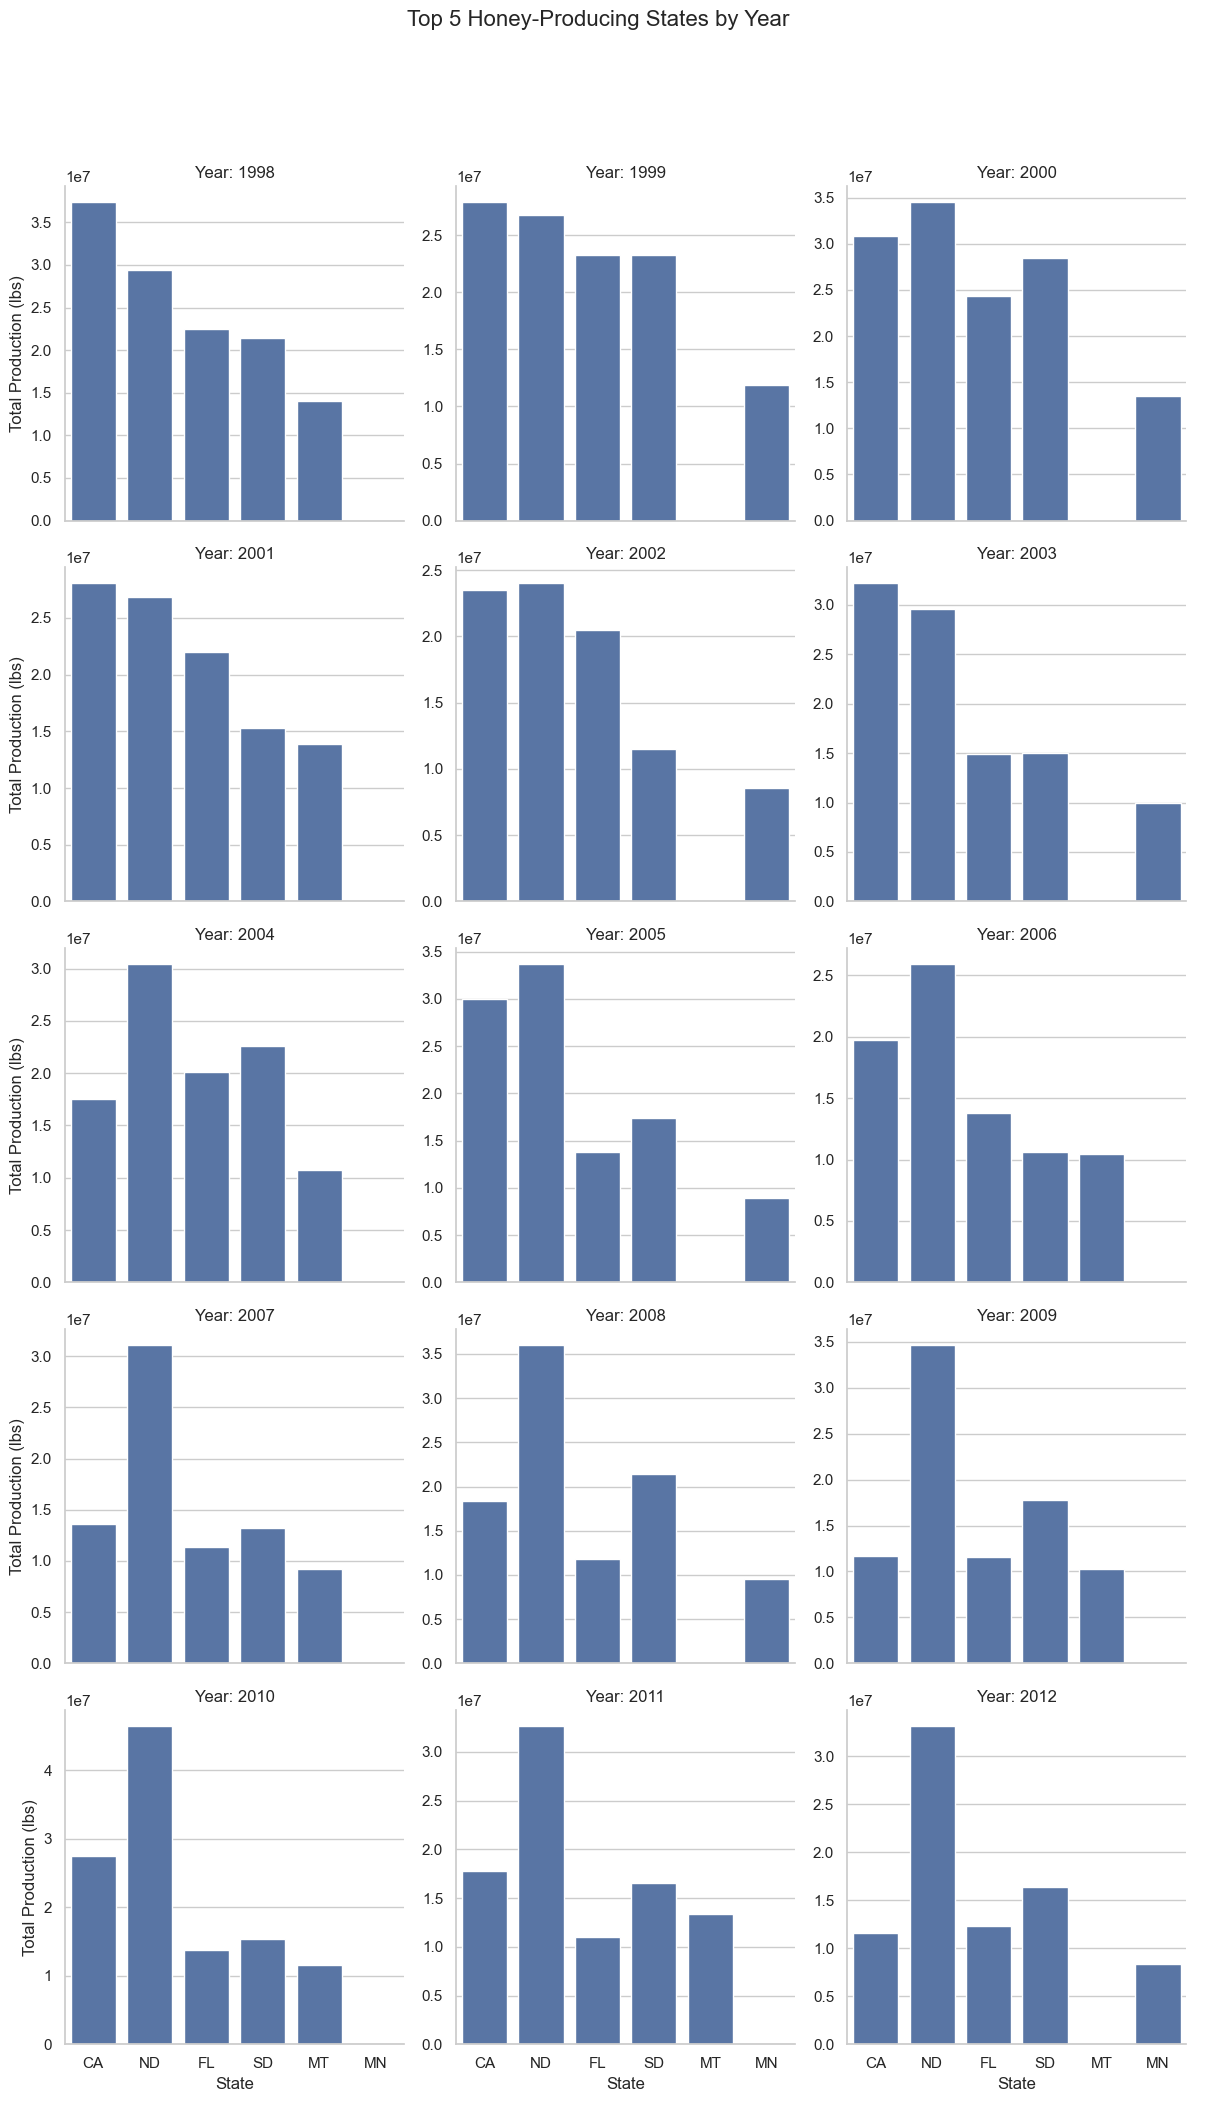

In [5]:
# Get top 5 states by production for each year
top_states_per_year = (
    honey_df.groupby('year', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'totalprod'))
    .reset_index(drop=True)
)

# Set seaborn style
sns.set(style='whitegrid')

# Create Faceted Bar Charts
g = sns.catplot(
    data=top_states_per_year,
    kind='bar',
    x='state',
    y='totalprod',
    col='year',
    col_wrap=3,
    height=4,
    sharey=False,
)

g.set_titles("Year: {col_name}")
g.set_axis_labels("State", "Total Production (lbs)")
g.fig.suptitle("Top 5 Honey-Producing States by Year", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

We can see that certain states, such as North Dakota (ND), South Dakota (SD), California (CA), and Florida (FL), consistently appear among the top producers across years. This highlights their significant role in national honey production. Additionally, the relative production amounts and rankings can shift year to year, reflecting changes in local conditions, climate, or industry practices.